In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
print(tf.version)

<module 'tensorflow_core._api.v2.version' from '/Users/anandramesh/anaconda3/lib/python3.7/site-packages/tensorflow_core/_api/v2/version/__init__.py'>


### Linear equation with two inputs 

In [35]:
obs=1000
xs=np.random.uniform(-10,10,(obs,1))
ys=np.random.uniform(-10,10,(obs,1))
inputs=np.column_stack((xs,ys))
noise=np.random.uniform(-1,1,(obs,1))
target=2*xs-3*ys+5+noise


### Saving inputs as numpy file 

In [36]:
np.savez('TF', inputs=inputs, target=target)

In [37]:
training_data=np.load('TF.npz')
training_data

In [38]:
input_size=2
output_size=1

### Model building 

In [39]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(output_size, kernel_initializer=tf.random_uniform_initializer(minval=-0.1,maxval=0.1),
                          bias_initializer=tf.random_uniform_initializer(minval=-0.1,maxval=0.1))
])

### Model training

In [40]:
custom_optimizer=tf.keras.optimizers.SGD(learning_rate=0.02)
model.compile(optimizer=custom_optimizer, loss='mean_squared_error')
model.fit(training_data['inputs'],training_data['target'], epochs=100, verbose=2)

Train on 1000 samples
Epoch 1/100
1000/1000 - 0s - loss: 53.2102
Epoch 2/100
1000/1000 - 0s - loss: 1.1930
Epoch 3/100
1000/1000 - 0s - loss: 0.4924
Epoch 4/100
1000/1000 - 0s - loss: 0.3889
Epoch 5/100
1000/1000 - 0s - loss: 0.3961
Epoch 6/100
1000/1000 - 0s - loss: 0.3946
Epoch 7/100
1000/1000 - 0s - loss: 0.4014
Epoch 8/100
1000/1000 - 0s - loss: 0.3738
Epoch 9/100
1000/1000 - 0s - loss: 0.3897
Epoch 10/100
1000/1000 - 0s - loss: 0.4123
Epoch 11/100
1000/1000 - 0s - loss: 0.3970
Epoch 12/100
1000/1000 - 0s - loss: 0.3946
Epoch 13/100
1000/1000 - 0s - loss: 0.3881
Epoch 14/100
1000/1000 - 0s - loss: 0.4029
Epoch 15/100
1000/1000 - 0s - loss: 0.3893
Epoch 16/100
1000/1000 - 0s - loss: 0.4120
Epoch 17/100
1000/1000 - 0s - loss: 0.3874
Epoch 18/100
1000/1000 - 0s - loss: 0.3897
Epoch 19/100
1000/1000 - 0s - loss: 0.3892
Epoch 20/100
1000/1000 - 0s - loss: 0.4149
Epoch 21/100
1000/1000 - 0s - loss: 0.4141
Epoch 22/100
1000/1000 - 0s - loss: 0.4149
Epoch 23/100
1000/1000 - 0s - loss: 0.38

In [41]:
weight= model.layers[0].get_weights()[0]
weight

array([[ 2.023634],
       [-3.040973]], dtype=float32)

In [42]:
bias=model.layers[0].get_weights()[1]
bias

array([4.9977283], dtype=float32)

In [43]:
predict_output=model.predict_on_batch(training_data['inputs'])

In [44]:
training_data['target']

array([[ 2.45048764e+01],
       [ 1.07102137e+01],
       [ 5.02364644e+00],
       [ 3.94370527e+01],
       [ 2.06984395e+01],
       [ 1.99773969e+01],
       [-1.11855165e+01],
       [-1.94543143e+01],
       [-2.65692655e+01],
       [ 2.85162201e+01],
       [-1.76016229e+01],
       [ 3.47852718e+01],
       [-2.27408415e+01],
       [-2.28781407e+00],
       [-7.49216718e+00],
       [ 2.48075425e+01],
       [-1.46272075e+01],
       [-8.07459610e+00],
       [ 2.09102118e+01],
       [-1.65378870e+00],
       [-3.87718323e+01],
       [-2.47830324e+01],
       [-3.56330371e+01],
       [ 1.66821279e+01],
       [ 1.01116484e+01],
       [-1.83108555e+01],
       [-6.35984135e+00],
       [-3.88143846e+01],
       [-6.57871480e+00],
       [-6.83605956e+00],
       [ 4.02303603e+01],
       [-1.77177673e+01],
       [-4.91362535e+00],
       [-2.48049413e+01],
       [-2.14669453e+01],
       [-1.13147634e+01],
       [-2.76488058e+00],
       [-2.16075005e+01],
       [-4.1

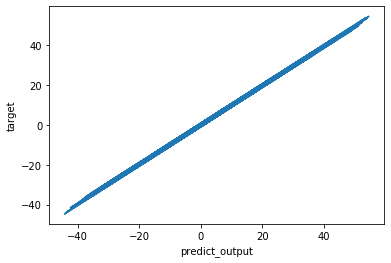

In [45]:
plt.plot(np.squeeze(predict_output), np.squeeze(training_data['target']))
plt.xlabel('predict_output')
plt.ylabel('target')
plt.show()